In this project, I've built CNN model using data augmentaion and batch normalization techniques to imporve CIFIAR-10 previous results.


# Data augmentation

It is a method of virtually adding more data without acutally having it.

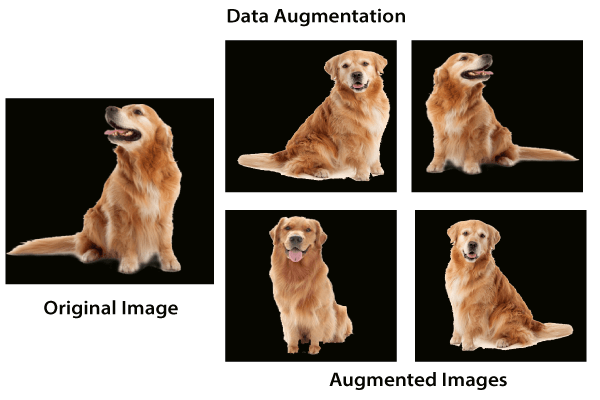

In the above images, we can agree that this is the same dog. Unfortunately while this is easy for us, it's not so easy for a computer. 

Now the neural network may be able to identify this because of convolution but there's a way to help neural network learn this translational invariance using data augmentation. 

Translation invariance means that the system produces exactly the same response, regardless of how its input is shifted.

In Keras, when we want to do data augmentation, instead of precalculating all of our augumented iamges beforehand, we can create them on the fly. 
For each batch of data we augment x_batch using some randomely genearted values, then we yield x_batch & y_batch.

In other words, only a small slice of x train is ever argumented on each iteration. Importantly it's done randomely, so we get something different each time, which helps with generalization.

#  Batch normalization help optimization 

It is important to standardize data before passing it into alogrithms,or perhaps there's a better amount of shifting and a better amount of scaling that we can use that leads to a more optimal model.

But because this operation is done only on the input data, only the first layer sees normalized data, after being transformed by Dense layer it's no longer normalized.

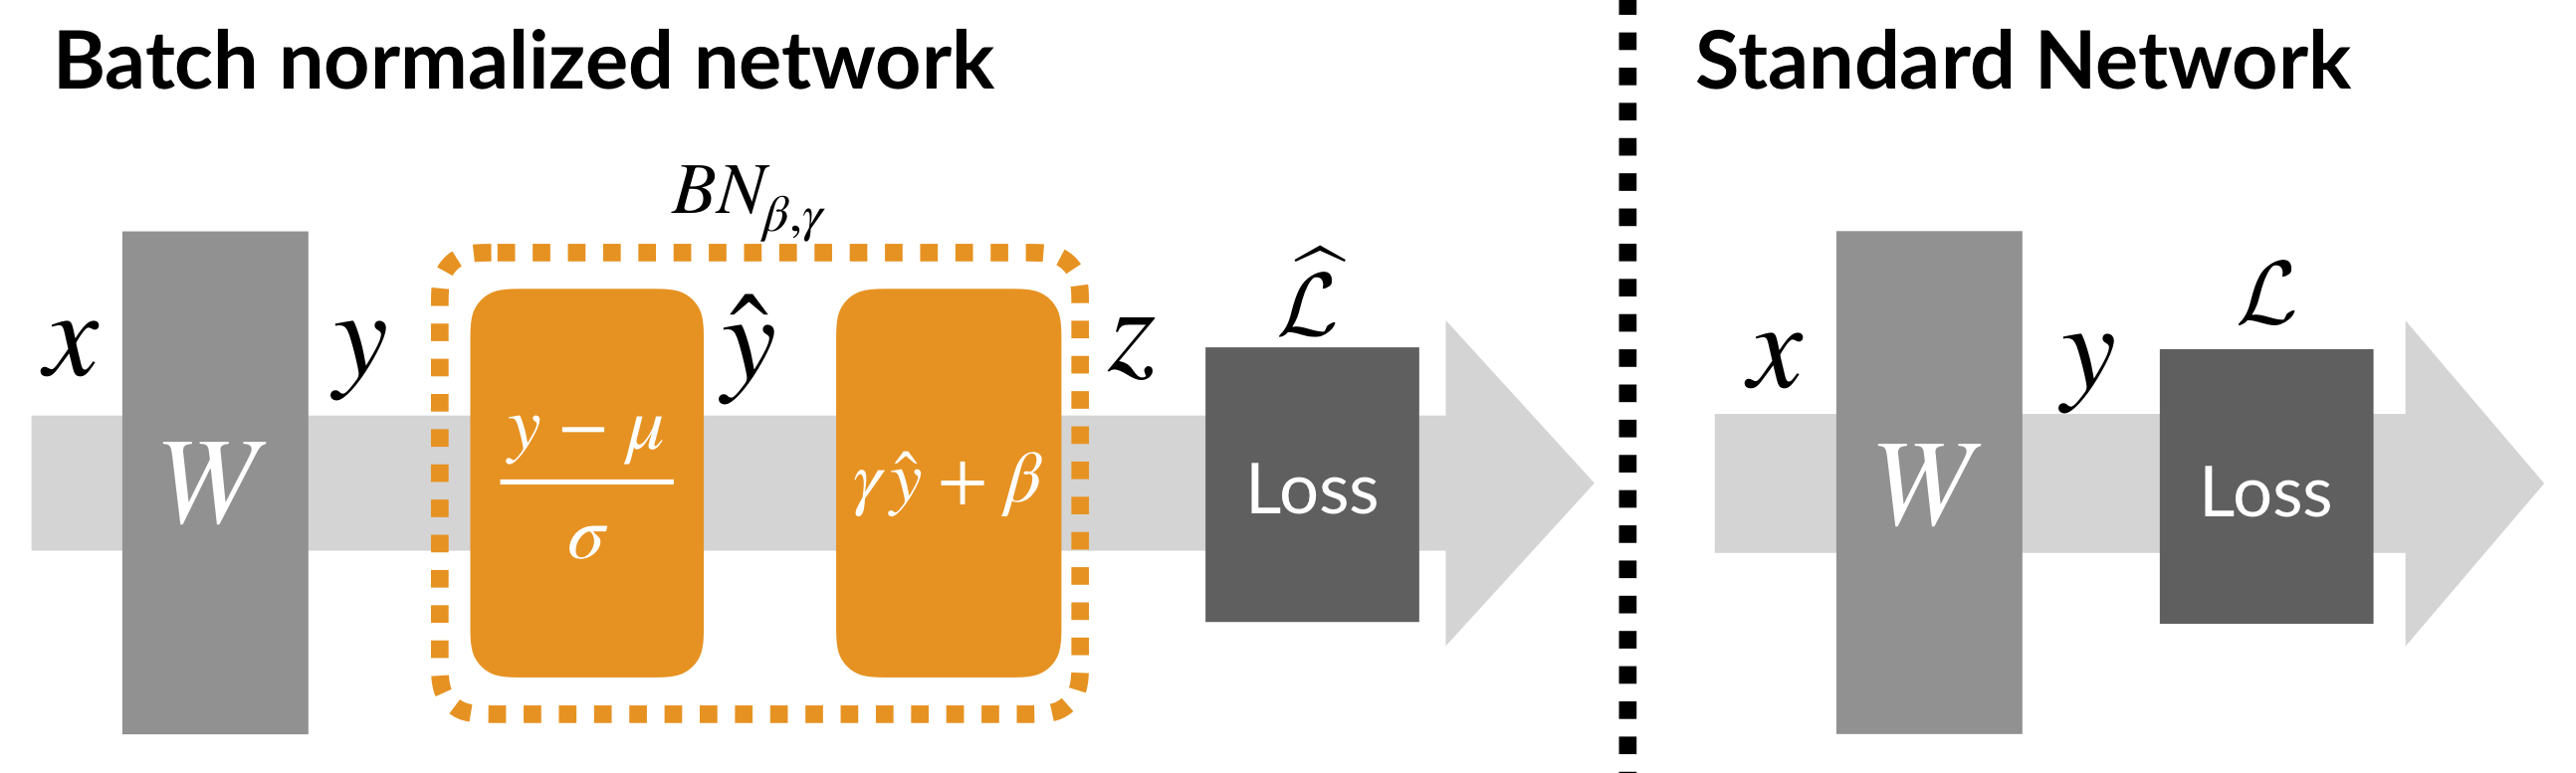
 

SO to make the data at every layer normalized, we have batch normalization layer. 
At first, it does normalization using batch mean and batch standared deviation, then it rescale data and shift the data, so that the final output has an optimal location and an optimal scale. These new parameters learns automatically using the gradient descent.

# Acts as a regularizer to avoid overfitting
The idea is because of each batch of data is slightly different, it's going to have a different mean and standared deviation.


*   They are not true mean/std of the whole dataset.
*   These diffrences are like noise, which slightly change what NN sees on each iteration, in other words, because the neural network always has to learn noisy images it becomes impervious to the noise.
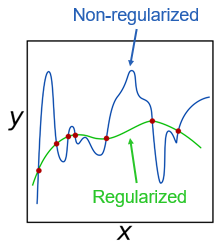

Batch normalization usually applied in between convolution layer.


In [16]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [17]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [18]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)

x_train.shape: (50000, 32, 32, 3)


In [19]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [20]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [21]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Data augmentation
# 1st- create an object of type image.ImageDataGenerator()
# The constructor for this image, accepts a bunch of arguments for how to argument the image, such as roation range, zoom range, brightness range ...etc
# Next call flow() and pass in the data, we want to augment and batch size

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/10
1562/1562 [==============================] - 719s 422ms/step - loss: 1.4509 - accuracy: 0.4970 - val_loss: 1.2500 - val_accuracy: 0.5678
Epoch 2/10
1562/1562 [==============================] - 654s 419ms/step - loss: 1.0224 - accuracy: 0.6458 - val_loss: 0.8534 - val_accuracy: 0.7049
Epoch 3/10
1562/1562 [==============================] - 635s 406ms/step - loss: 0.8563 - accuracy: 0.7033 - val_loss: 0.7517 - val_accuracy: 0.7423
Epoch 4/10
1562/1562 [==============================] - 634s 406ms/step - loss: 0.7571 - accuracy: 0.7422 - val_loss: 1.1740 - val_accuracy: 0.6313
Epoch 5/10
1562/1562 [==============================] - 648s 415ms/step - loss: 0.6907 - accuracy: 0.7659 - val_loss: 0.7010 - val_accuracy: 0.7715
Epoch 6/10
1562/1562 [==============================] - 642s 411ms/step - loss: 0.6372 - accuracy: 0.7835 - val_loss: 0.6515 - val_accuracy: 0.7859
Epoch 7/10
1562/1562 [==============================] - 639s 409ms/step - loss: 0.5946 - accuracy: 0.7987 - val_

The model final accuracy is about 83% on train set and 81% on test set.
So we get lower traning accuracy but a much higher validation accuracy, so there less overfitting but the model has imporved.

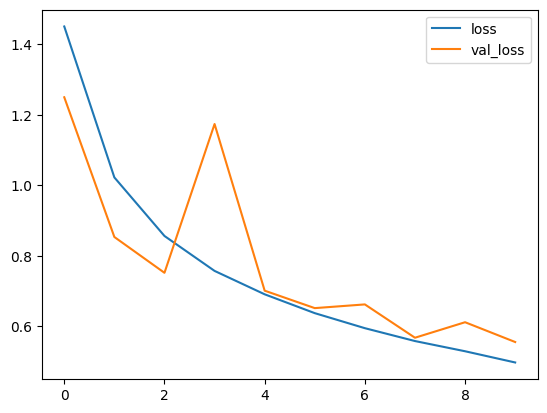

In [24]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Here, we can see much better learning curve.

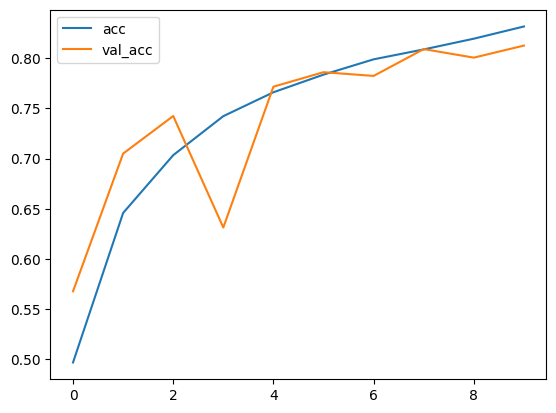

In [25]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 27s 87ms/step
Confusion matrix, without normalization
[[802  19  34  37  14   4   4  24  17  45]
 [  7 955   1   2   2   2   3   2   2  24]
 [ 41   4 669  72  80  60  41  23   2   8]
 [  9   6  20 768  33  82  27  46   2   7]
 [  9   4  25  65 792  31  28  42   2   2]
 [  6   4  13 158  34 731   9  44   0   1]
 [  3   6  20  90  34  10 826   9   2   0]
 [  6   0   9  23  28  16   4 909   0   5]
 [ 81  42  11  27   7   8   2  11 775  36]
 [ 11  71   1   5   4   2   2   6   1 897]]


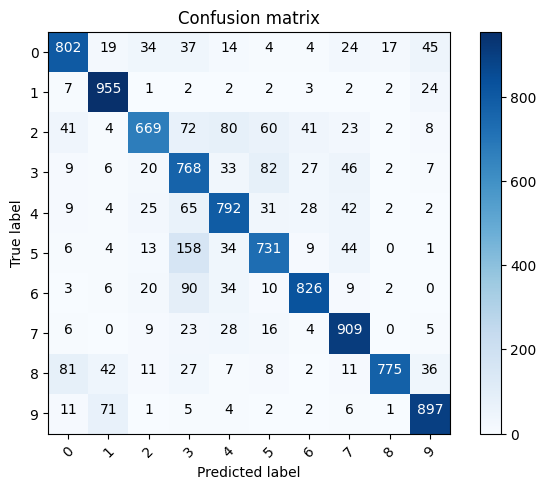

In [26]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In the above confusion matrix, 



*   At true label 5 and predicted label 3, we can see misclassification.
*   And at true label 3 and predicted label at 5.

*   So 3 and 5 are getting confused pretty often. 
*   IF we look at labels 3 is cat and 5 is dog.
Now that makes lot of sense, because these images are so small, it's pretty easy to confuse a cat with a dog.


In [27]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

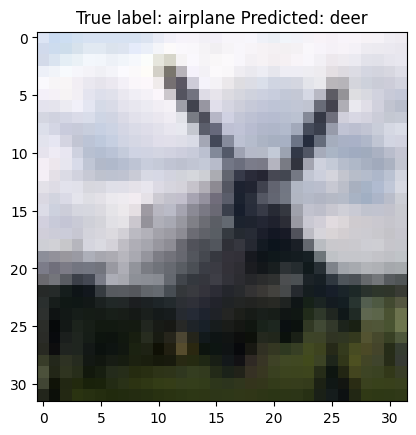

In [38]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

From the above result we would say, if we actually look at the the airplane from this dataset, they just appear as deer. 

In [29]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0   